#### Incrustación - Ejemplo 1
Propósito del ejemplo  <br>
Implementación simple de un modelo de incrustación. 


In [ ]:
#! pip install sentence_transformers --quiet
#! pip install -U langchain-huggingface

In [4]:
from langchain_huggingface import HuggingFaceEmbeddings
#from tqdm.autonotebook import tqdm, trange  # Evita mensaje de advertencia

texto = "Me gusta LangChain."
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
resultado = embeddings.embed_query(texto)
# es un vector de dimension 384
print(len(resultado))
print(resultado[:5])

384
[-0.01823749579489231, 0.014366884715855122, 0.03611148148775101, 0.008936765603721142, -0.0819280743598938]


#### Incrustación - Ejemplo 2
Propósito del ejemplo <br>
Generar una representación visual de incrustación.


In [ ]:
! pip install matplotlib scikit-learn --quiet

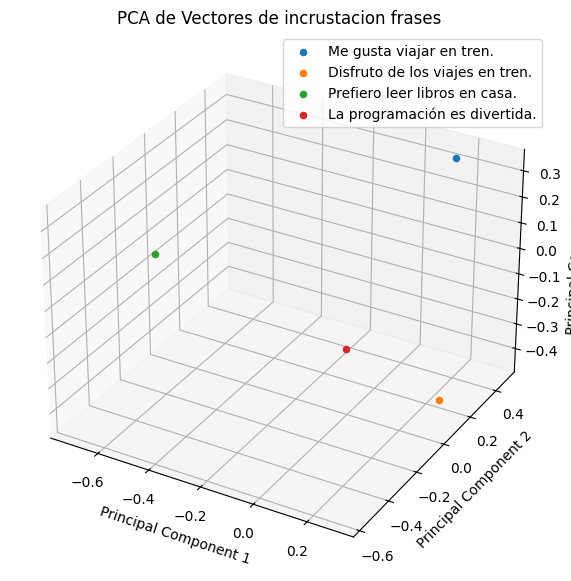

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from langchain_huggingface import HuggingFaceEmbeddings

# Initializar el modelo de incrustacion
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Las dos primeras frases son similares. 
frases = [
    "Me gusta viajar en tren.",
    "Disfruto de los viajes en tren.",
    "Prefiero leer libros en casa.",
    "La programación es divertida."
]

# Incrustar las frases empleando comprension de listas
embeddings_vectors = [embeddings.embed_query(frase) for frase in frases]

# Usar PCA para reducir la dimensionalidad y poder graficar el resultado
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(embeddings_vectors)

# Graficar los vectores
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for i, frase in enumerate(frases):
    ax.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], reduced_vectors[i, 2], label=frase)

ax.set_title("PCA de Vectores de incrustacion frases")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend()
plt.show()

#### Corroboración con producto escalar
Propósito del ejemplo <br>
Corroborar el resultado del ejemplo 2 empleando producto escalar. Repasar Producto escalar si fuere necesario.


In [6]:
import numpy as np
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

# Las dos primeras frases son similares. 
frase1= "Me gusta viajar en tren."
frase2= "Disfruto de los viajes en tren."
frase3= "Prefiero leer libros en casa."
frase4= "La programación es divertida."

# Incrustar las frases
incr1 = embeddings.embed_query(frase1)
incr2 = embeddings.embed_query(frase2)
incr3 = embeddings.embed_query(frase3)
incr4 = embeddings.embed_query(frase4)
#print(incr1)   # Devuelve un vector de dimension 384
# Calcular el producto escalar
print("frase1-frase2", np.dot(incr1, incr2))
print("frase1-frase4", np.dot(incr1, incr4))      

frase1-frase2 0.6543842454822961
frase1-frase4 0.43625601875467385
